In [3]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

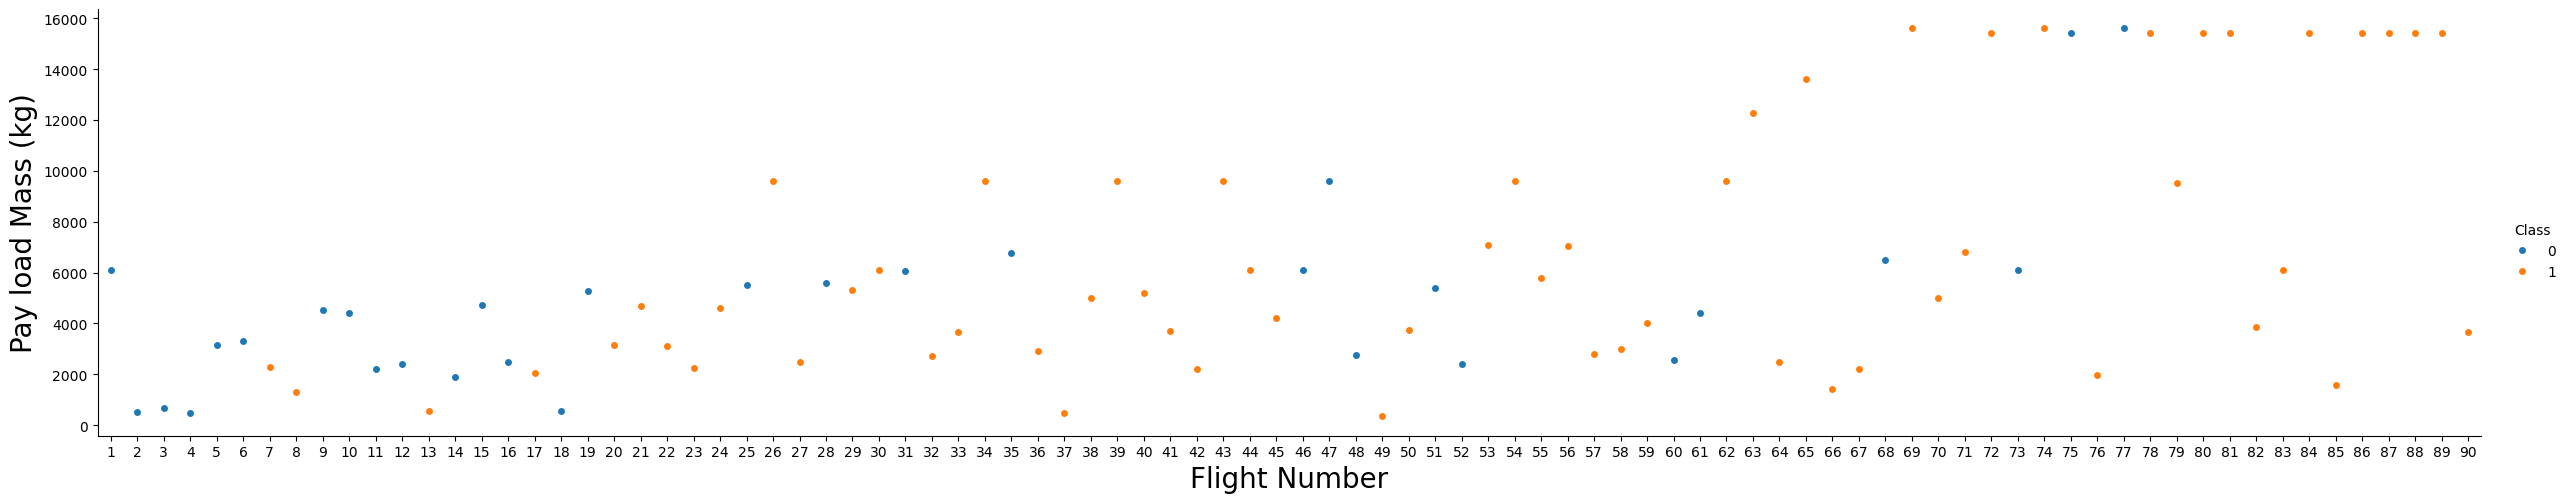

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates. CCAFS LC-40, has a success rate of 60 %, while KSC LC-39A and VAFB SLC 4E has a success rate of 77%.

Next, let's drill down to each site visualize its detailed launch records.

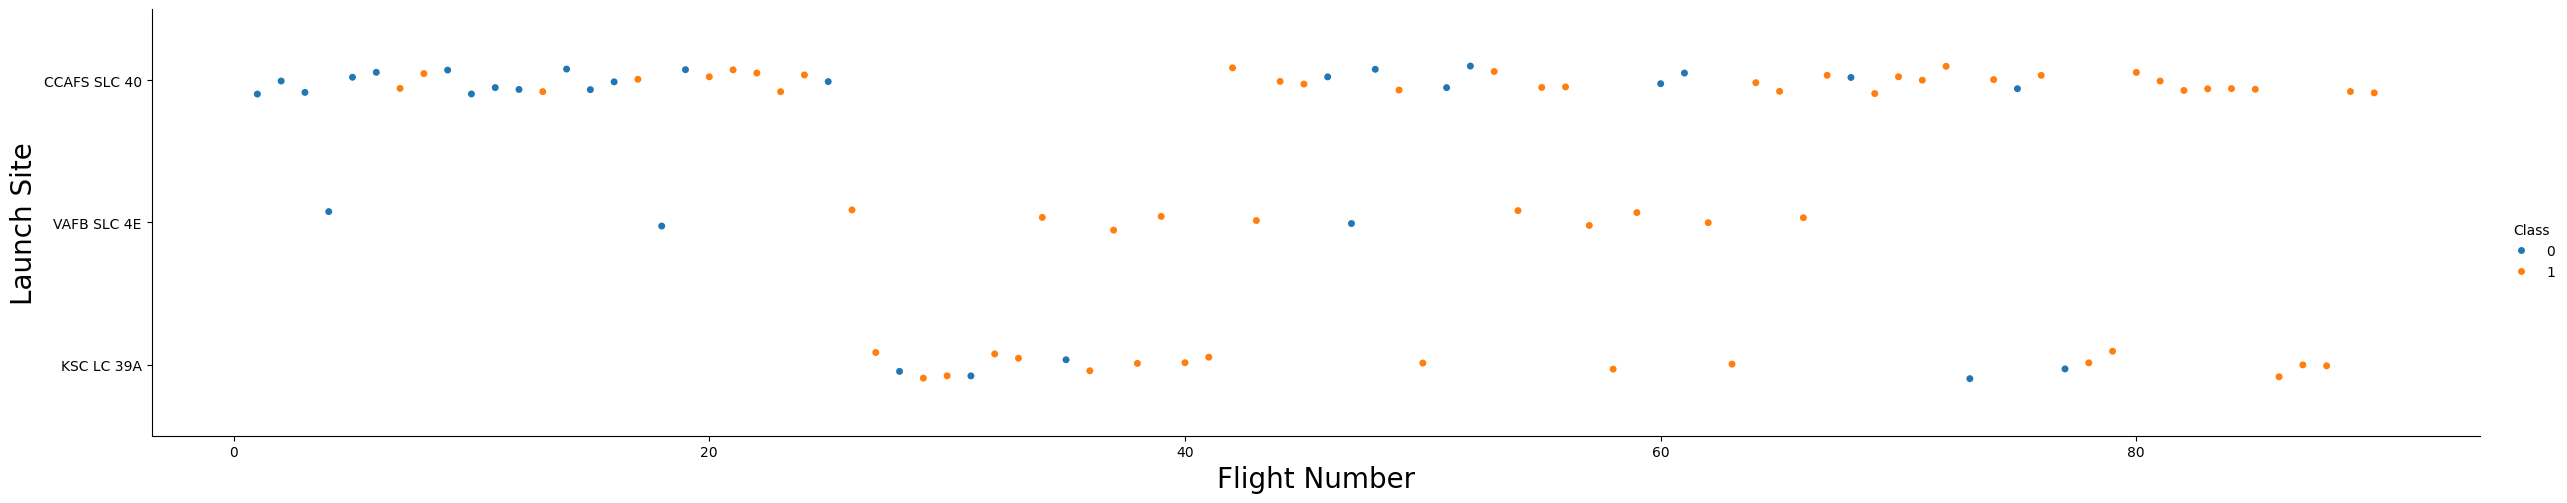

In [7]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'

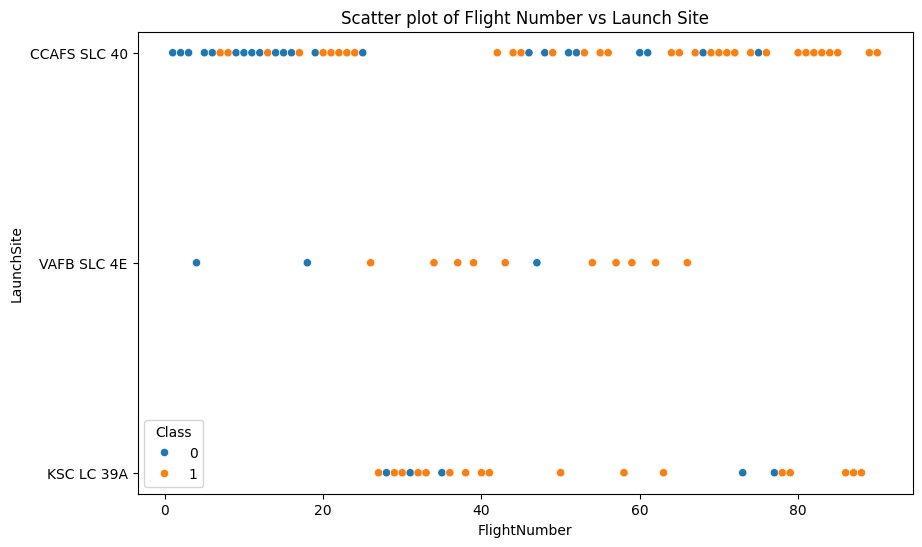

In [12]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class')
plt.title('Scatter plot of Flight Number vs Launch Site')
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.

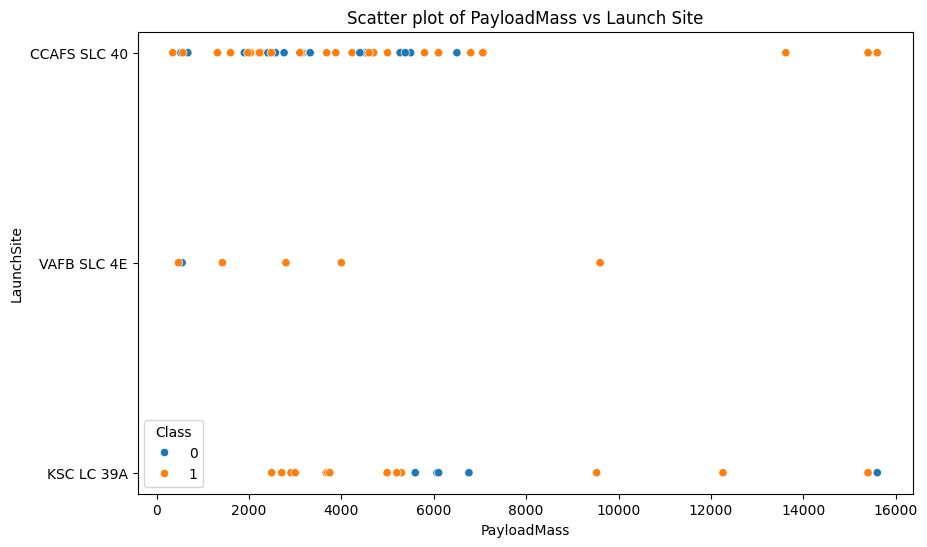

In [17]:
### TASK 2: Visualize the relationship between Payload and Launch Site
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class')
plt.title('Scatter plot of PayloadMass vs Launch Site')
plt.show()


In [ ]:
We also want to observe if there is any relationship between launch sites and their payload mass.
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there 
are no rockets launched for heavypayload mass(greater than 10000).    

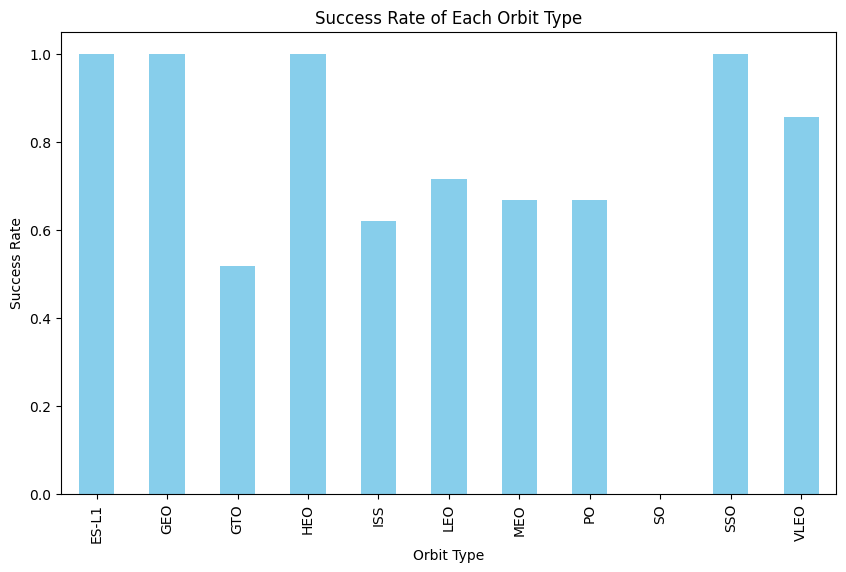

In [18]:
### TASK  3: Visualize the relationship between success rate of each orbit type
import matplotlib.pyplot as plt

# Calculate the success rate for each orbit type
success_rate = df.groupby('Orbit')['Class'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
success_rate.plot(kind='bar', color='skyblue')

plt.title('Success Rate of Each Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.show()



Next, we want to visually check if there are any relationship between success rate and orbit type.

Let's create a bar chart for the sucess rate of each orbit

In [ ]:
# HINT use groupby method on Orbit column and get the mean of Class column

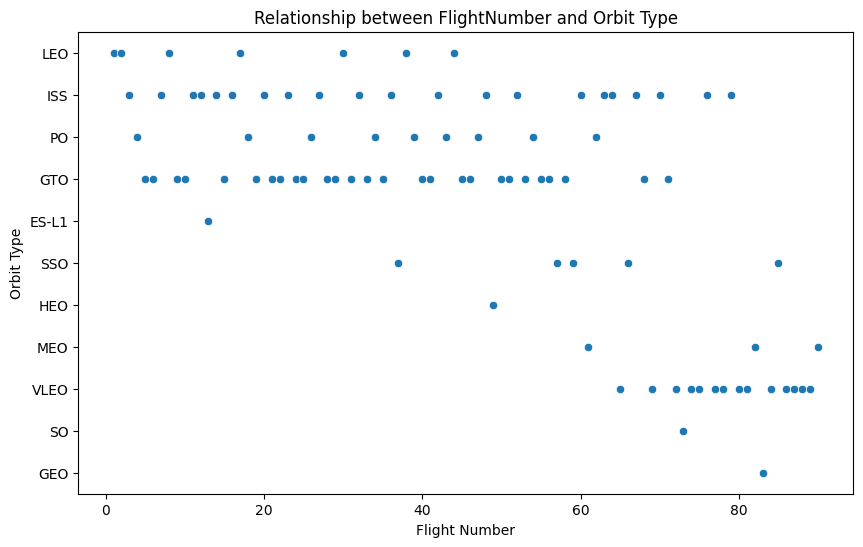

In [19]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming that 'df' is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit')

plt.title('Relationship between FlightNumber and Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.show()


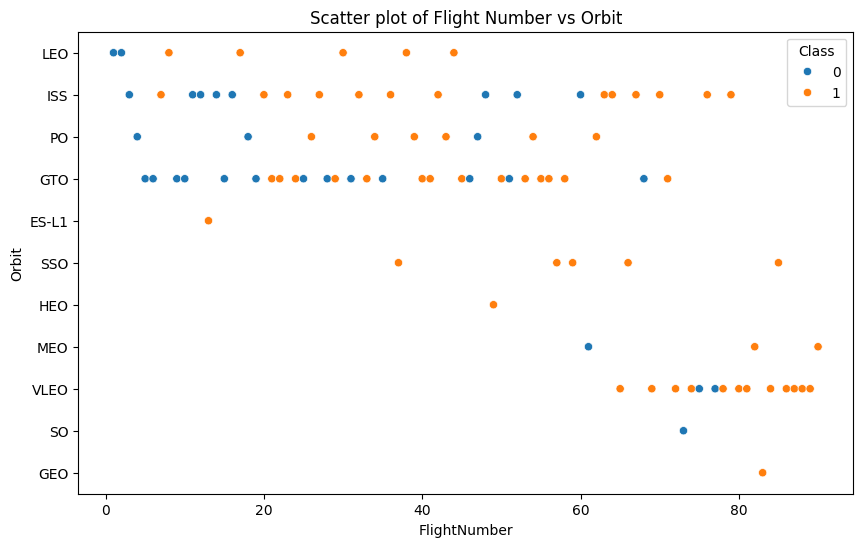

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class')
plt.title('Scatter plot of Flight Number vs Orbit')
plt.show()

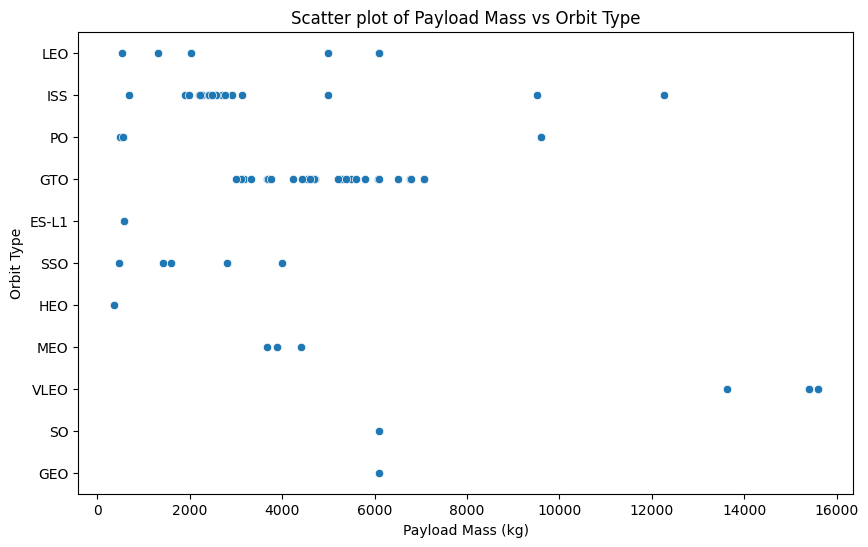

In [22]:
### TASK 5: Visualize the relationship between Payload and Orbit type

# Assuming that 'df' is your DataFrame

# Assuming that 'df' is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit')

plt.title('Scatter plot of Payload Mass vs Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.show()


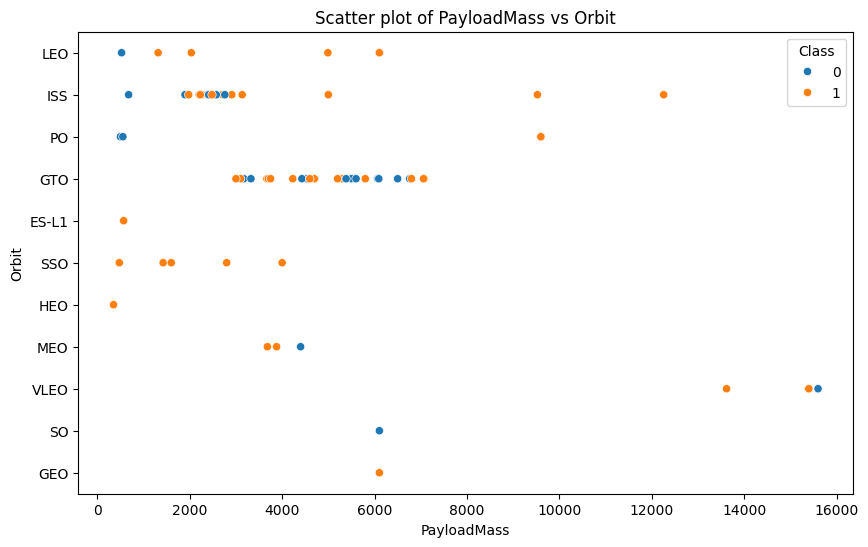

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class')
yearly_success_rate = df.groupby('Year')['Class'].mean()
plt.title('Scatter plot of PayloadMass vs Orbit')
plt.show()

In [28]:
import matplotlib.pyplot as plt

# Calculate average success rate by year
df['Success'] = df['Success'].astype(int)  # Ensure 'Success' is integer type
yearly_success_rate = df.groupby('Year')['Success'].mean()

# Plot the yearly trend of launch success
plt.figure(figsize=(10, 6))
plt.plot(yearly_success_rate.index, yearly_success_rate.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.title('Yearly Trend of Launch Success')
plt.grid(True)
plt.show()



<class 'KeyError'>: 'Success'